## <font color="green">**_Better Signal Processing_**  

<font color="green"> 
XDAS includes many tools built in, just like OBSPY. We'll see how to filter, plot spectrograms and make an FK plot.

</font>

In [1]:
#-- Import common packages
import numpy as np
import xdas as xd
import xdas.signal as xs
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import xdas.fft as xfft


## <font color="green"> Open the data.
<font color="green"> This is just copying relevant things from previous notebook.</font>

In [2]:
data = xd.open_mfdataarray('./DAS_Data_Skience2025/Athens/Earthquakes/20211012/*nc')

earthquake = data.sel(time=slice("2021-10-12T09:24:30", "2021-10-12T09:28:00"))
earthquake.load()
earthquake = earthquake * 116.0 / 8192.0 * 400.0 / 10.0 * 1e-9

print(earthquake)

<xdas.DataArray (time: 10500, distance: 12416)>
[[-8.326172e-08 -1.529297e-08  8.949219e-08 ... -3.137891e-07
  -5.086328e-07 -5.409180e-07]
 [-1.880469e-07 -3.245508e-07 -2.582813e-07 ... -2.333594e-07
  -3.443750e-07 -2.237305e-07]
 [ 4.157422e-07  3.092578e-07  2.073047e-07 ...  1.189453e-08
   1.472656e-07  4.706836e-07]
 ...
 [-2.662109e-07 -3.670313e-07 -4.333008e-07 ...  6.966797e-08
   7.080078e-08 -6.230469e-08]
 [-1.098828e-07 -1.376367e-07 -2.333594e-07 ...  3.285156e-07
   3.619336e-07  4.701172e-08]
 [ 4.672852e-07  5.075000e-07  4.735156e-07 ...  1.093164e-07
   1.240430e-07  4.644531e-08]]
Coordinates:
  * time (time): 2021-10-12T09:24:30.001 to 2021-10-12T09:27:59.981
  * distance (distance): -264.380 to 25085.858


<font color="green"></font>

---
## <font color="green">Bandpass Filter</font>

<font color="green">Many functions are built-in to XDAS, including a butterworth bandpass filter</font>


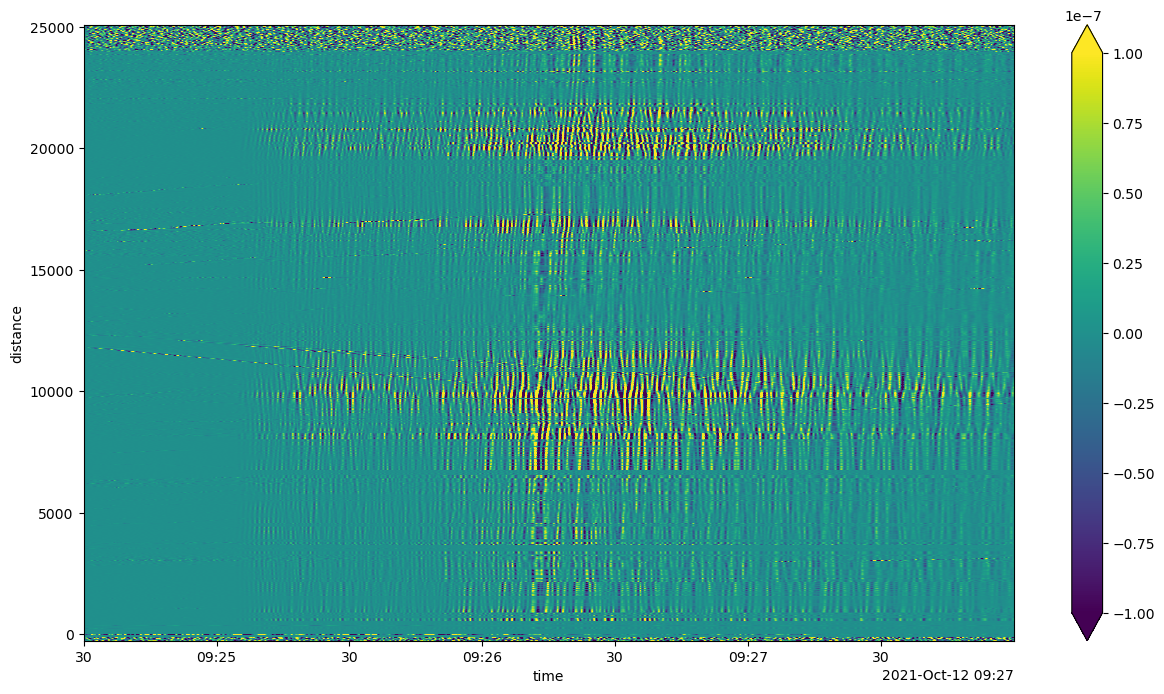

In [3]:
earthquake_filtered = xs.filter(earthquake, [0.1,1], 'bandpass', corners=4, dim="time")

plt.figure(figsize=(15,8))
ax = plt.gca()
earthquake_filtered.plot(x="time",ax=ax,vmin=-100e-9,vmax=100e-9) 

---
## <font color="green">Envelope</font>

<font color="green">We can get the envelope by taking the absolute value of the Hilbert Transform</font>


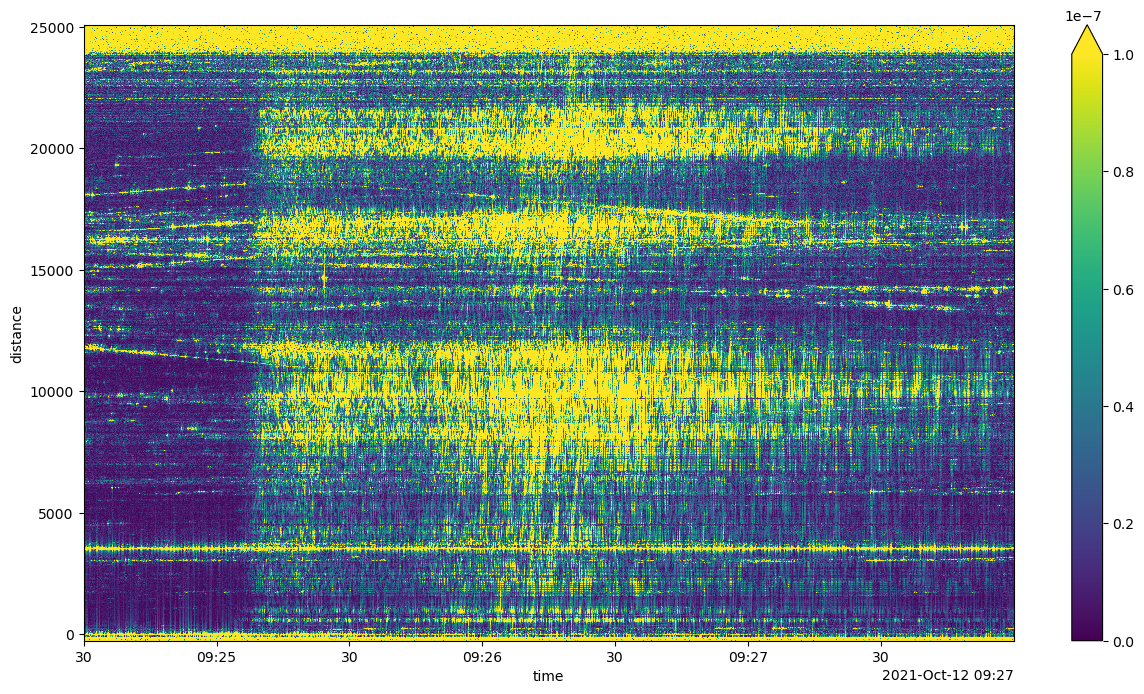

In [4]:
earthquake_hilbert = xs.hilbert(earthquake)
earthquake_envelope = np.abs(earthquake_hilbert)

plt.figure(figsize=(15,8))
ax = plt.gca()
earthquake_envelope.plot(x="time",ax=ax,vmin=0,vmax=100e-9) 

---
## <font color="green">Spectrogram / Short-term Fourier Transform (STFT)</font>

<font color="green">Chop up the timeseries into little bits, and look at the fourier spectra as it evolves in time. Can you see the earthquake?</font>


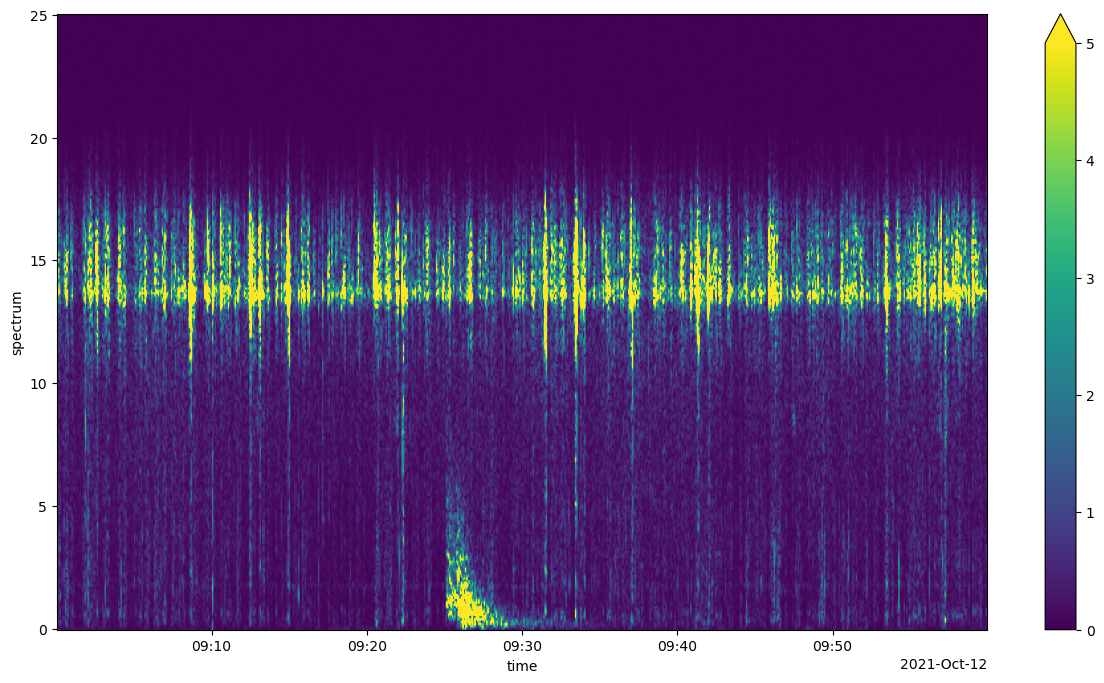

In [5]:
#-- Pick one channel to investigate
ichan = 1000

#-- run "stft"
#-- In this case, we'll run it on the whole 1 hour of data in the directory
sp = xs.stft(data[:,ichan],window="hann",nperseg=512,dim={"time":"spectrum"},return_onesided=True)
sp = np.abs(sp)

#-- Plot
plt.figure(figsize=(15,8))
ax = plt.gca()
sp.plot(interpolation="antialiased",ax=ax,x="time", vmin=0, vmax=5)

---
## <font color="green">FK filter</font>

<font color="green">Fourier transform in time and space</font>


In [6]:
#-- The FK spectra is messed up by the noisy channels at the start and end of the line, so we can manually remove them.
fk = earthquake.sel(distance=slice(1000, 20000))
fk = xs.taper(fk, dim="distance")
fk = xs.taper(fk, dim="time")
fk = xfft.rfft(fk, dim={"time": "frequency"})  # rename "time" -> "frequency"
fk = xfft.fft(fk, dim={"distance": "wavenumber"})  # rename "distance" -> "wavenumber"
fk = 20 * np.log10(np.abs(fk))



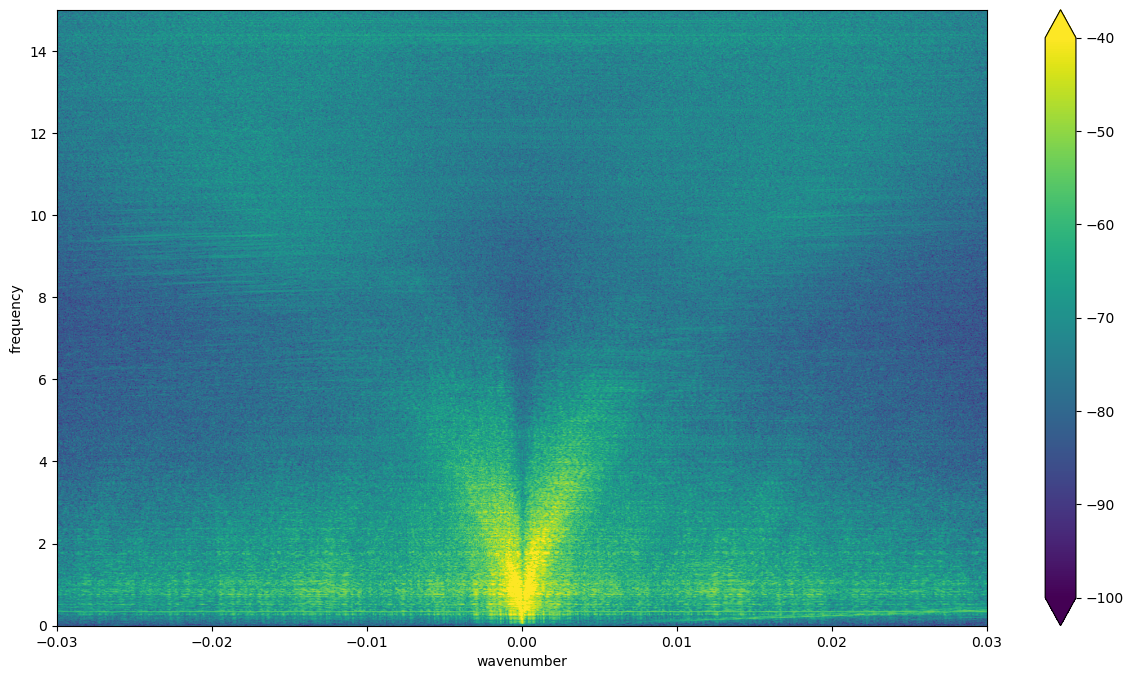

In [7]:
#-- Plot
plt.figure(figsize=(15,8))
ax = plt.gca()
fk.plot(interpolation="antialiased",ax=ax, vmin=-100, vmax=-40, xlim=(-0.03, 0.03),ylim=(0,15))

## <font color="blue"> Question / Discussion: 
#### <font color="blue"> For which frequencies was the earthquake strongest? What velocity were the strongest waves propagating?</font>


---
## <font color="blue"> Exercise: 
#### <font color="blue"> What happens when we look at the FK plot of other times? Are there other interesting signals we can see in the urban data?</font>


In [8]:
#-- Select some different time window, plot, filter, try FK!




